<a href="https://colab.research.google.com/github/ytycmx/Heston-model/blob/master/cubic_spline_part_code_hw1Q1_cheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{a1: 1.22806540770328e-5, b1: -1.84209811155492e-5, c1: -0.000645087647782216, d1: 0.0286456139874104, a2: 2.61407799733713e-5, b2: -0.000101581736493580, c2: -0.000478766137026154, d2: 0.0285347329802397, a3: 8.77021343984797e-6, b3: 5.47533623081300e-5, c3: -0.000947771433431285, d3: 0.0290037382766448, a4: -4.12216337327632e-5, b4: 0.000654655528379464, c4: -0.00334738009771662, d4: 0.0322032164956919, a5: -2.55367522420275e-6, b5: 7.46361507510572e-5, c5: -0.000447283209574587, d5: 0.0273697216821218, a6: -3.91772845675645e-6, b6: 0.000103281268634685, c6: -0.000647799034759980, d6: 0.0278375919408878, a7: 2.37509751133478e-7, b7: -2.13758776020130e-5, c7: 0.000598772427606999, d7: 0.0236823537329978}


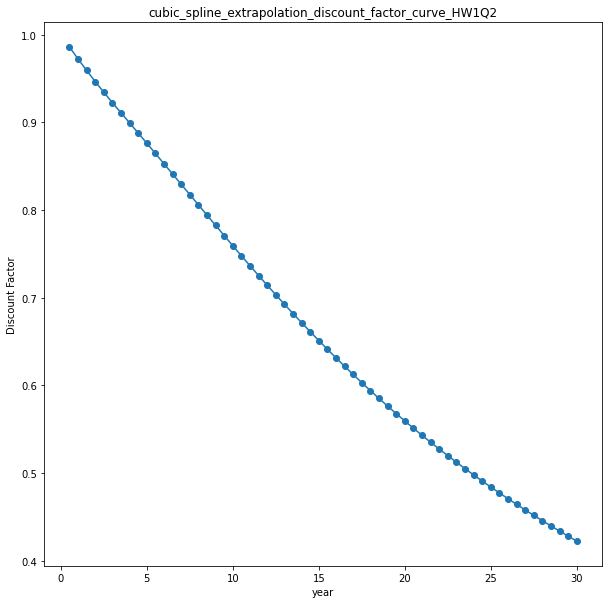

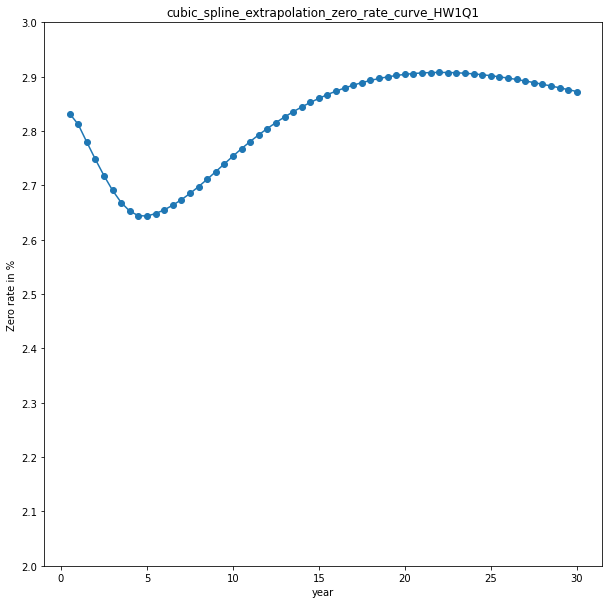

[0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.4166666666666667, 0.5, 0.5833333333333334, 0.6666666666666666, 0.75, 0.8333333333333334, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666667, 1.25, 1.3333333333333333, 1.4166666666666667, 1.5, 1.5833333333333333, 1.6666666666666667, 1.75, 1.8333333333333333, 1.9166666666666667, 2.0, 2.0833333333333335, 2.1666666666666665, 2.25, 2.3333333333333335, 2.4166666666666665, 2.5, 2.5833333333333335, 2.6666666666666665, 2.75, 2.8333333333333335, 2.9166666666666665, 3.0, 3.0833333333333335, 3.1666666666666665, 3.25, 3.3333333333333335, 3.4166666666666665, 3.5, 3.5833333333333335, 3.6666666666666665, 3.75, 3.8333333333333335, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666667, 4.25, 4.333333333333333, 4.416666666666667, 4.5, 4.583333333333333, 4.666666666666667, 4.75, 4.833333333333333, 4.916666666666667, 5.0, 5.083333333333333, 5.166666666666667, 5.25, 5.333333333333333, 5.416666666666667, 5.5, 5.583333

In [30]:
import pandas as pd
import numpy as np
import sympy as sym
from sympy import*
import matplotlib.pyplot as plt

# Define the symbols and functions we need
x = symbols('x');
y = symbols('y');
a1,b1,c1,d1 = symbols('a1,b1,c1,d1');
a2,b2,c2,d2 = symbols('a2,b2,c2,d2');
a3,b3,c3,d3 = symbols('a3,b3,c3,d3');
a4,b4,c4,d4 = symbols('a4,b4,c4,d4');
a5,b5,c5,d5 = symbols('a5,b5,c5,d5');
a6,b6,c6,d6 = symbols('a6,b6,c6,d6');
a7,b7,c7,d7 = symbols('a7,b7,c7,d7');
def fun1(x):
  return a1*x**3+b1*x**2+c1*x+d1
def fun2(x):
  return a2*x**3+b2*x**2+c2*x+d2
def fun3(x):
  return a3*x**3+b3*x**2+c3*x+d3
def fun4(x):
  return a4*x**3+b4*x**2+c4*x+d4
def fun5(x):
  return a5*x**3+b5*x**2+c5*x+d5
def fun6(x):
  return a6*x**3+b6*x**2+c6*x+d6
def fun7(x):
  return a7*x**3+b7*x**2+c7*x+d7
def fun1p(x):
  return 3*a1*x**2+2*b1*x+c1
def fun2p(x):
  return 3*a2*x**2+2*b2*x+c2
def fun3p(x):
  return 3*a3*x**2+2*b3*x+c3
def fun4p(x):
  return 3*a4*x**2+2*b4*x+c4
def fun5p(x):
  return 3*a5*x**2+2*b5*x+c5
def fun6p(x):
  return 3*a6*x**2+2*b6*x+c6
def fun7p(x):
  return 3*a7*x**2+2*b7*x+c7
def fun1pp(x):
  return 6*a1*x+2*b1
def fun2pp(x):
  return 6*a2*x+2*b2
def fun3pp(x):
  return 6*a3*x+2*b3
def fun4pp(x):
  return 6*a4*x+2*b4
def fun5pp(x):
  return 6*a5*x+2*b5
def fun6pp(x):
  return 6*a6*x+2*b6
def fun7pp(x):
  return 6*a7*x+2*b7

# Now we import the 28 equations (actually we only need the "for" iteration to get the last 7 equations) and solve the 28 unknown variables
R = [0.02832*0.5,0.02738*0.5,0.02689*0.5,0.02665*0.5,0.02668*0.5,0.02702*0.5,0.02777*0.5,0.02882*0.5];
r = [i*2 for i in R];
yr = [0.5,2,3,4,5,7,10,30];
oldnum = [j*2 for j in yr];
dyr = [3,2,2,2,4,6,40];
adddyr = [3,5,7,9,13,19,59];
num = [4,6,8,10,14,20,60];
dnum = [2,2,2,4,6,40];
yrd = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30];

solved_value = [];
solved_value = solve([fun1(0.5)-0.02832,fun1(2)-0.02738,fun2(2)-0.02738,fun2(3)-0.02689,fun3(3)-0.02689,fun3(4)-0.02665,fun4(4)-0.02665,fun4(5)-0.02668,fun5(5)-0.02668,fun5(7)-0.02702,fun6(7)-0.02702,fun6(10)-0.02777,fun7(10)-0.02777,fun7(30)-0.02882,\
                      fun1p(2)-fun2p(2),fun2p(3)-fun3p(3),fun3p(4)-fun4p(4),fun4p(5)-fun5p(5),fun5p(7)-fun6p(7),fun6p(10)-fun7p(10),fun1pp(2)-fun2pp(2),fun2pp(3)-fun3pp(3),fun3pp(4)-fun4pp(4),fun4pp(5)-fun5pp(5),fun5pp(7)-fun6pp(7),fun6pp(10)-fun7pp(10),fun1pp(0.5),fun7pp(30)],[a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7])
print(solved_value);
a1= 1.22806540770328*10**(-5);b1= -1.84209811155492*10**(-5);c1= -0.000645087647782216;d1= 0.0286456139874104;a2= 2.61407799733713*10**(-5);b2=-0.000101581736493580;c2= -0.000478766137026154;d2= 0.0285347329802397;a3= 8.77021343984797*10**(-6);
b3= 5.47533623081300*10**(-5);c3= -0.000947771433431285;d3= 0.0290037382766448;a4= -4.12216337327632*10**(-5);b4= 0.000654655528379464;c4= -0.00334738009771662;d4= 0.0322032164956919;a5= -2.55367522420275*10**(-6);b5= 7.46361507510572*10**(-5);
c5= -0.000447283209574587;d5= 0.0273697216821218;a6= -3.91772845675645*10**(-6);b6= 0.000103281268634685;c6= -0.000647799034759980;d6= 0.0278375919408878;a7= 2.37509751133478*10**(-7);b7= -2.13758776020130*10**(-5);c7= 0.000598772427606999;d7= 0.0236823537329978;

ak = [1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30];
ak1 = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30];

swapall = [0.02832,fun1(ak[0]),fun1(ak[1]),fun1(ak[2]),fun2(ak[3]),fun2(ak[4]),fun3(ak[5]),fun3(ak[6]),fun4(ak[7]),fun4(ak[8]),fun5(ak[9]),fun5(ak[10]),fun5(ak[11]),fun5(ak[12]),fun6(ak[13]),fun6(ak[14]),fun6(ak[15]),fun6(ak[16]),fun6(ak[17]),fun6(ak[18]),fun7(ak[19]),fun7(ak[20]),fun7(ak[21]),fun7(ak[22]),fun7(ak[23]),fun7(ak[24]),fun7(ak[25]),fun7(ak[26]),fun7(ak[27]),fun7(ak[28]),fun7(ak[29]),fun7(ak[30]),fun7(ak[31]),fun7(ak[32]),fun7(ak[33]),fun7(ak[34]),fun7(ak[35]),fun7(ak[36]),fun7(ak[37]),fun7(ak[38]),fun7(ak[39]),fun7(ak[40]),fun7(ak[41]),fun7(ak[42]),fun7(ak[43]),fun7(ak[44]),fun7(ak[45]),fun7(ak[46]),fun7(ak[47]),fun7(ak[48]),fun7(ak[49]),fun7(ak[50]),fun7(ak[51]),fun7(ak[52]),fun7(ak[53]),fun7(ak[54]),fun7(ak[55]),fun7(ak[56]),fun7(ak[57]),fun7(ak[58])];
#print(swapall);
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros
DF = zerolistmaker(60);
DF[0] = 1/(1+swapall[0]*0.5);
#print(DF);
for i in range(1,60,1):
  DF[i] = DF[i]+1/(swapall[i-1]*0.5 + 1);
  for j in range(0,i,1):
   DF[i] = DF[i] - swapall[i-1]*0.5/(swapall[i-1]*0.5 + 1)*(DF[j]);
  #print(i);
#print(DF);

plt.figure(figsize = (10,10))
plt.scatter(ak1, DF)
plt.plot(ak1, DF)
plt.title("cubic_spline_extrapolation_discount_factor_curve_HW1Q2")
plt.xlabel("year")
plt.ylabel("Discount Factor")
plt.show()

spot = zerolistmaker(60);
spot[0] = 2.832;
for i in range(1,60,1):
  spot[i] = -np.log(DF[i])*100/ak1[i];
#print(spot);

plt.figure(figsize = (10,10))
plt.scatter(ak1, spot)
plt.plot(ak1, spot)
plt.title("cubic_spline_extrapolation_zero_rate_curve_HW1Q1")
plt.xlabel("year")
plt.ylabel("Zero rate in %")
y_major_locator = plt.MultipleLocator(0.1)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
plt.ylim(2,3)
plt.show()

akk = zerolistmaker(120);
spot = zerolistmaker(120);
for i in range(1,121,1):
  akk[i-1] = i/12;

for j in range(0,6,1):
  spot[j] = 0.02832;
for j in range(6,24,1):
  spot[j] = fun1(akk[j]);
for j in range(24,36,1):
  spot[j] = fun2(akk[j]);
for j in range(36,48,1):
  spot[j] = fun3(akk[j]);
for j in range(48,60,1):
  spot[j] = fun4(akk[j]);
for j in range(60,84,1):
  spot[j] = fun5(akk[j]);
for j in range(84,120,1):
  spot[j] = fun6(akk[j]);

price = 0;
for u in range(0,120,1):
  price = price + 100*0.06/12/(1+spot[u]/12)**u;

price = price + 100/(1+spot[119]/12)**120;
print(price);